In [1]:
import scipy.io as sio
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Lasso

In [2]:
def lassoFn(gammas, X, y):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    coefs = []
    labels = []
    mse = []
    r2_score = []
    for i in range (len(gammas)):
        lasso = linear_model.Lasso(alpha=gammas[i], fit_intercept=False)
        lasso.fit(X, y)
        coefs.append(lasso.coef_[:10])
        labels.append('b' + str(i+1))
        mse.append(mean_squared_error(y, lasso.predict(X)))
        r2_score.append(lasso.score(X, y))

    # Lasso coefficient plots
    plt.figure(figsize = (12,7))
    plt.plot(gammas , coefs)
    plt.title('Lasso coefficients')
    plt.xlabel('gamma')
    plt.ylabel('coefficients')
    plt.legend(labels)

    # Mean Squared Error & gamma plots
    plt.figure(figsize = (12,7))
    plt.plot(gammas , mse)
    plt.xlabel('gamma')
    plt.ylabel('Mean Squared Error')

    # Mean Squared Error & R-Squared plots
    plt.figure(figsize = (12,7))
    plt.plot(r2_score , mse)
    plt.xlabel('R-Squared')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='upper right')

# Dataset

In [3]:
data_mat = sio.loadmat('data-lasso.mat')

In [4]:
# check keys
data_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'b0', 'y'])

In [5]:
X_init = data_mat['X']
b0 = data_mat['b0']
y_init = data_mat['y']
# n sammples
N = X_init.shape[0]

# Problem 1

No handles with labels found to put in legend.


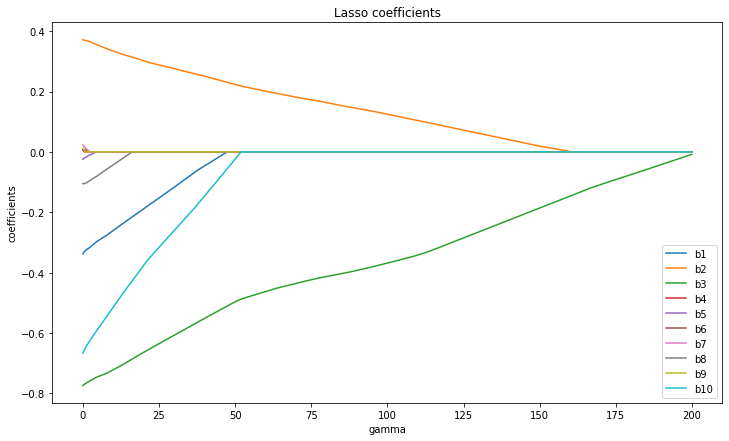

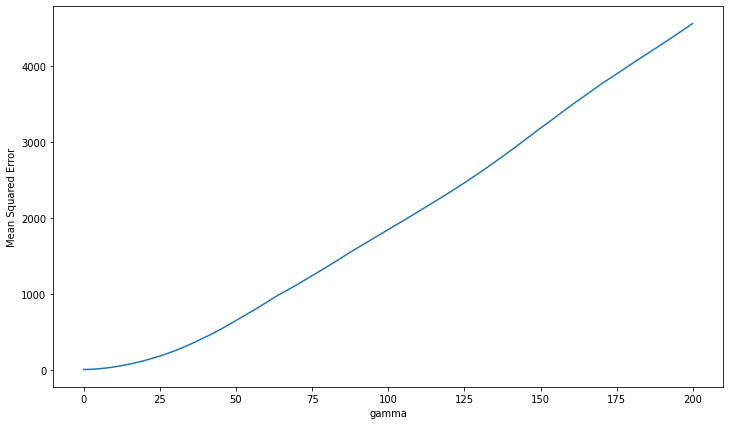

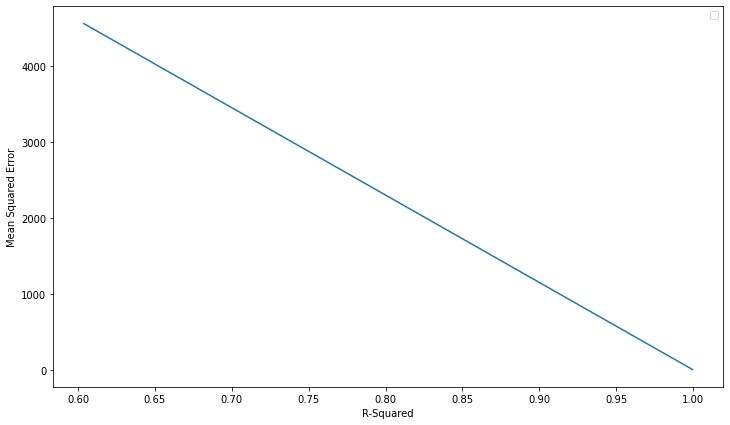

In [6]:
y_p1 = y_init*np.sqrt(N)
X_p1 = X_init*np.sqrt(N)
gammas = np.arange (0.01, 200, 0.1)
lassoFn(gammas, X_p1, y_p1)

# Problem 2

No handles with labels found to put in legend.


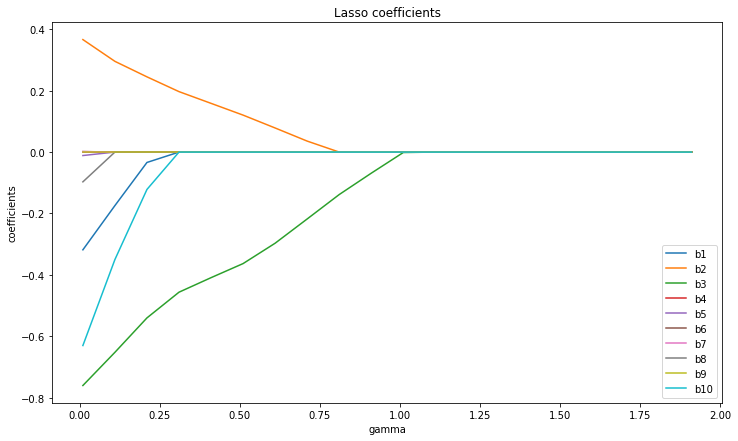

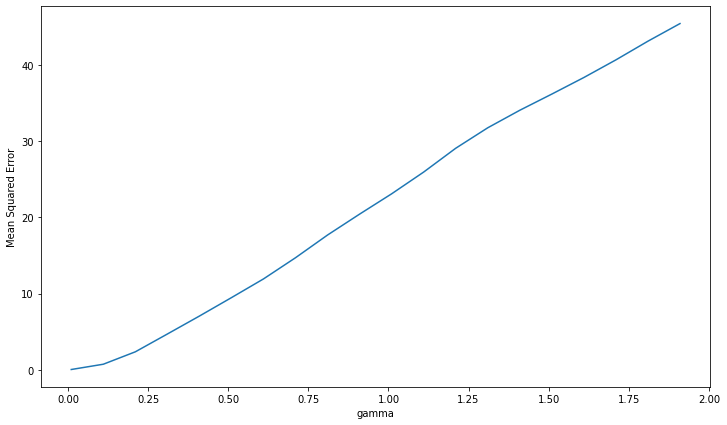

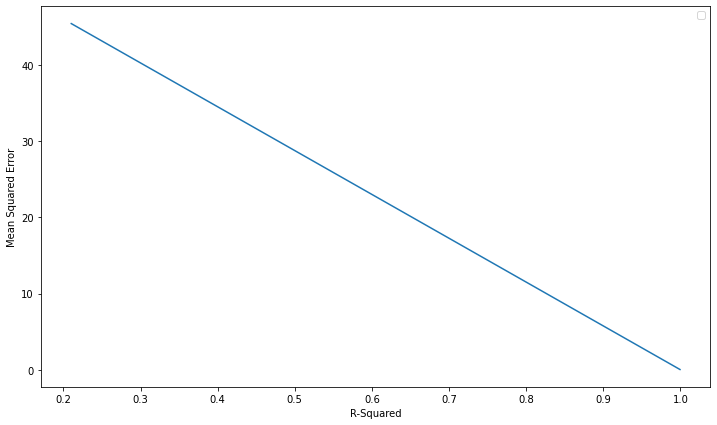

In [7]:
gammas = np.arange (0.01, 2, 0.1)
lassoFn(gammas, X_init, y_init)